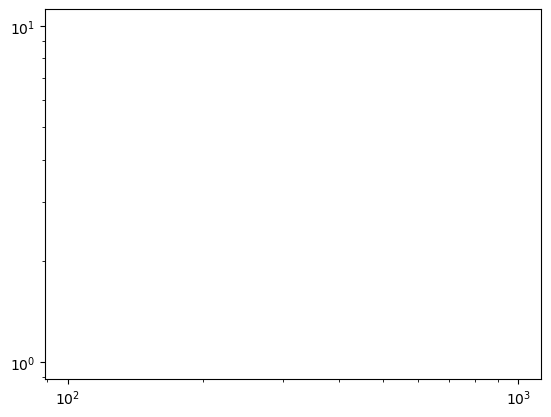

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Mplanck=1.22E19

DensityFactor = 1.5E8 # Product of s0/rho_c h^2

def sigmaV_to_ZZ_Approx(g, m):
    return g**4/(16*np.pi*m**2)



def gs_to_half(T):
    a, b, c = 10.2, 2.349, 0.252
    return a/(1 + np.exp( -b*(T - c)))

def Yeq(x):
    return 0.145*x**1.5*np.exp(-x)

X =np.logspace(np.log10(1),np.log10(100), int(1e4))

def dYdx(Y, x, σv, m, Mp):
    return - np.sqrt(np.pi/45)* Mp * m * σv * gs_to_half(m/x)/x**2 * (Y**2-Yeq(x)**2) 

def Y(x, m, σv, Mp):
    
    return odeint(dYdx, Yeq(x[0]), x, args=(σv, m, Mp), mxstep=100)

def Yinf(m, σv, Mp):
    return Y(X, m, σv, Mp)[-1,0]

def RelicDensity(m, σv, Mp):
    return DensityFactor*Yinf(m, σv, Mp)*m


mDM_array = np.logspace(2, 3, 100)
σv = 1e-9

RD_array = [RelicDensity(mDM, σv, Mp=Mplanck) for mDM in mDM_array]
plt.loglog(mDM_array, RD_array)
plt.show()

